In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-and-pollution-assessment/updated_pollution_dataset.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


data = pd.read_csv('/kaggle/input/air-quality-and-pollution-assessment/updated_pollution_dataset.csv')
print(data.head())

   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  


In [4]:
# 1. Summary Statistics
print("Summary Statistics:")
print(data.describe())  # Numerical columns
print("\nMode of each column:")
print(data.mode().iloc[0])  # Mode

Summary Statistics:
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                  

In [5]:
# 2. Data Types and Unique Value Counts
print("\nData Types and Unique Value Counts:")
print(data.dtypes)
print("\nUnique Values in Categorical Columns:")
print(data['Air Quality'].value_counts())




Data Types and Unique Value Counts:
Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object

Unique Values in Categorical Columns:
Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64


In [6]:
# 3. Missing Value Analysis
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


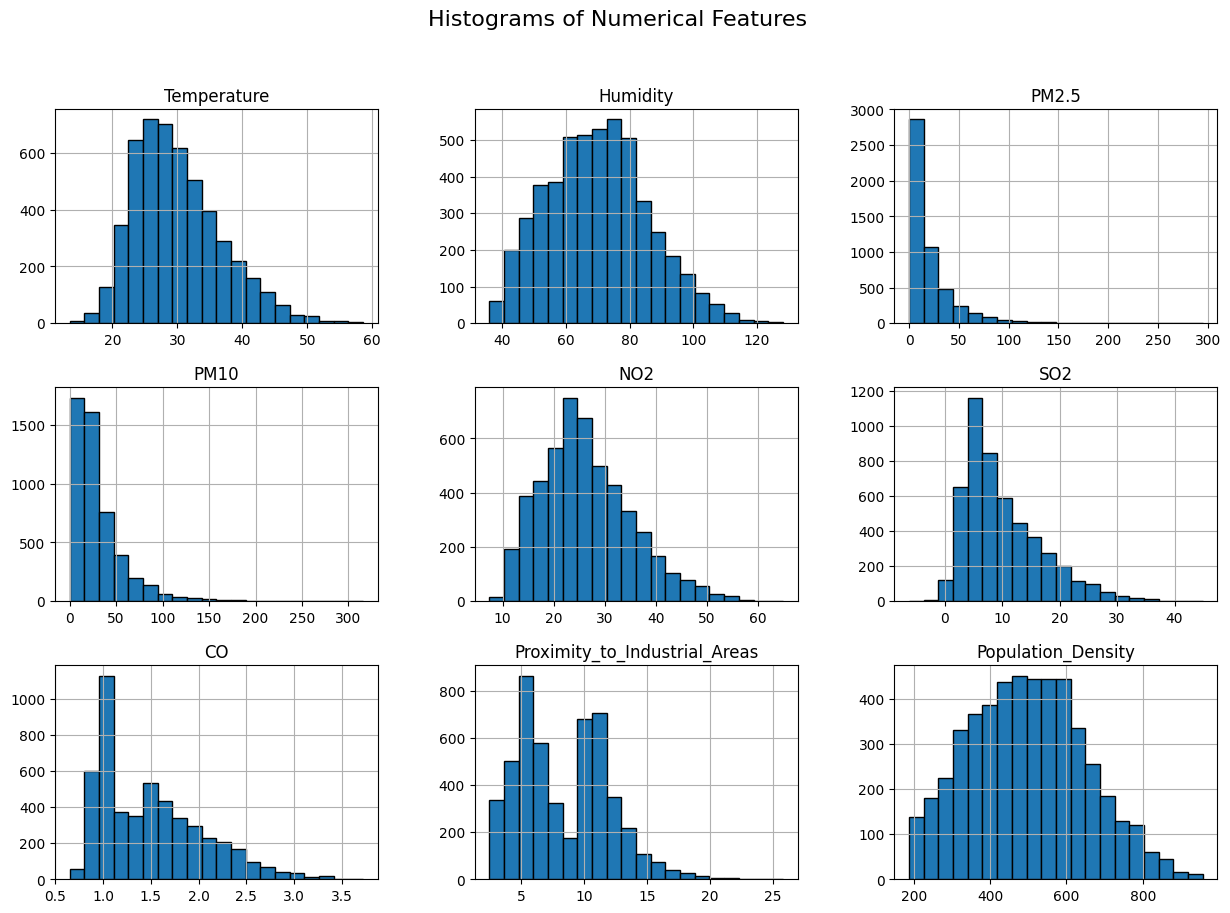

In [7]:
# 4. Visualizations
# Histogram for each numerical column
data.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

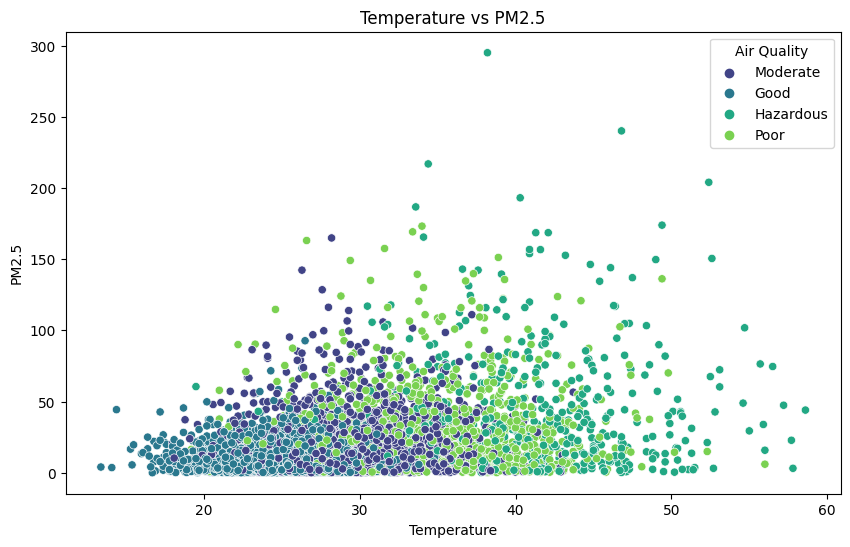

In [8]:
# Scatter Plot: Temperature vs PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='PM2.5', hue='Air Quality', data=data, palette='viridis')
plt.title('Temperature vs PM2.5')
plt.show()

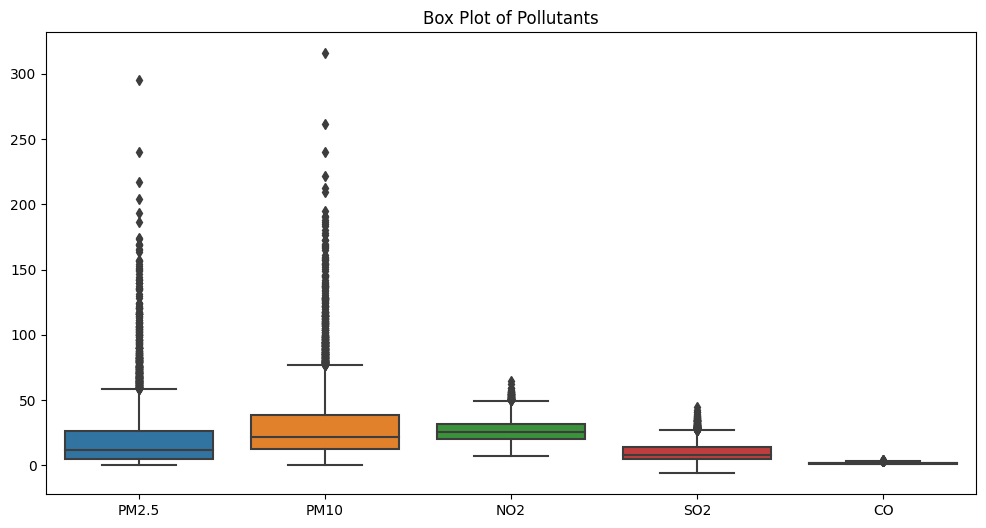

In [9]:
# Box Plot: Distribution of Pollutants
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']])
plt.title('Box Plot of Pollutants')
plt.show()


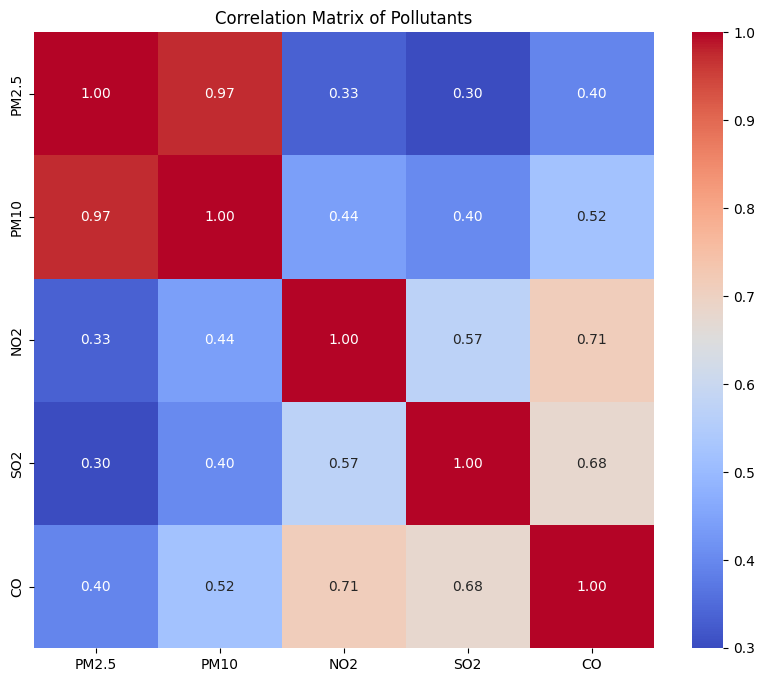

In [10]:
# 5. Correlation Analysis
corr_matrix = data[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Pollutants')
plt.show()

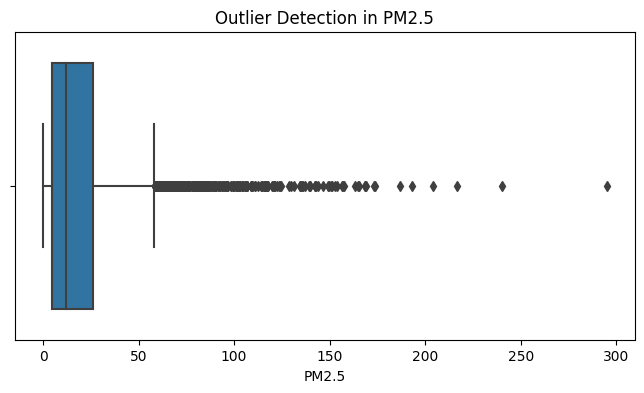

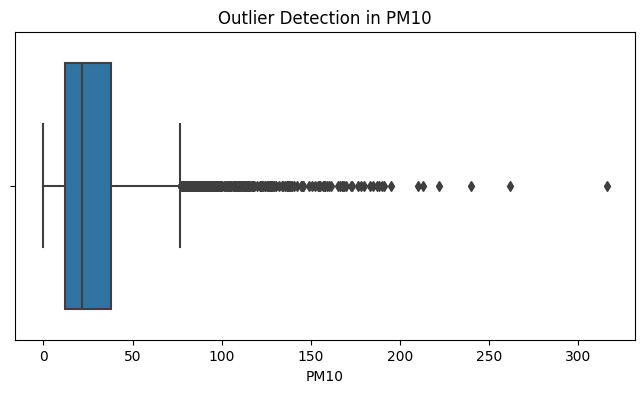

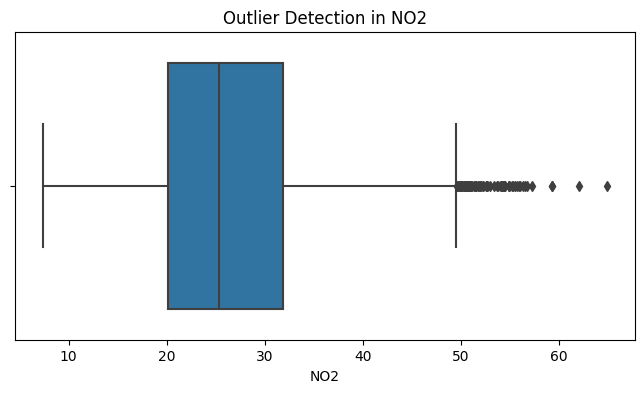

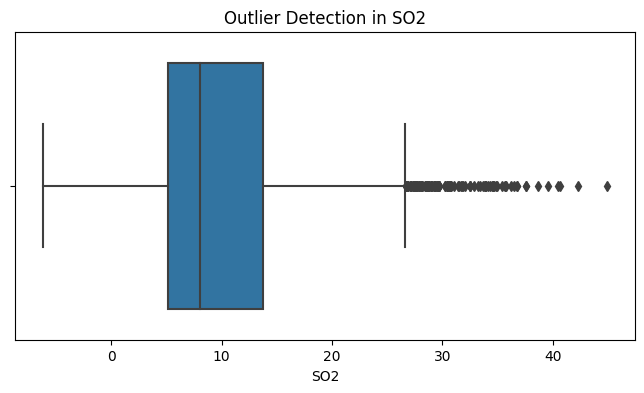

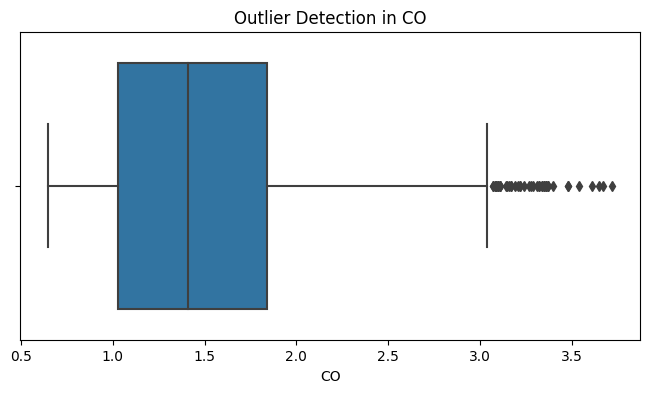

In [11]:
# 6. Outlier Detection: Boxplots
for column in ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Outlier Detection in {column}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


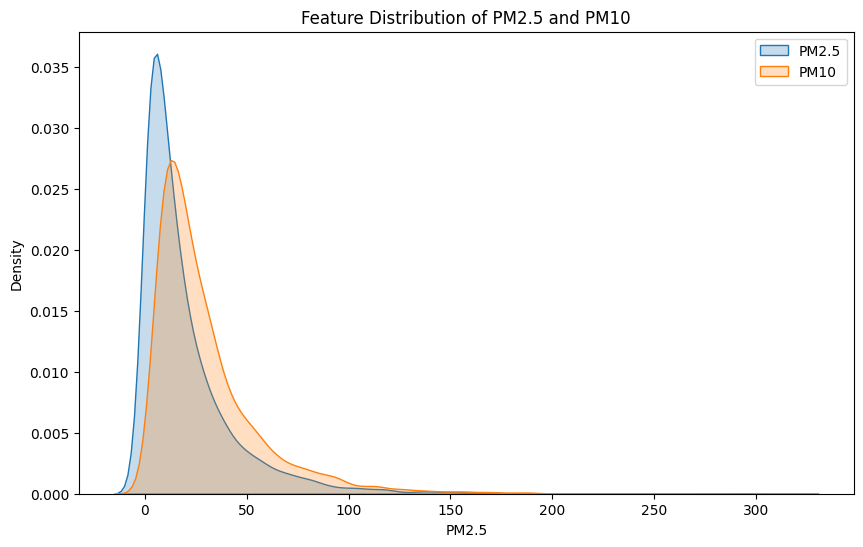

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['PM2.5'], label='PM2.5', fill=True)
sns.kdeplot(data['PM10'], label='PM10', fill=True)
plt.title('Feature Distribution of PM2.5 and PM10')
plt.legend()
plt.show()



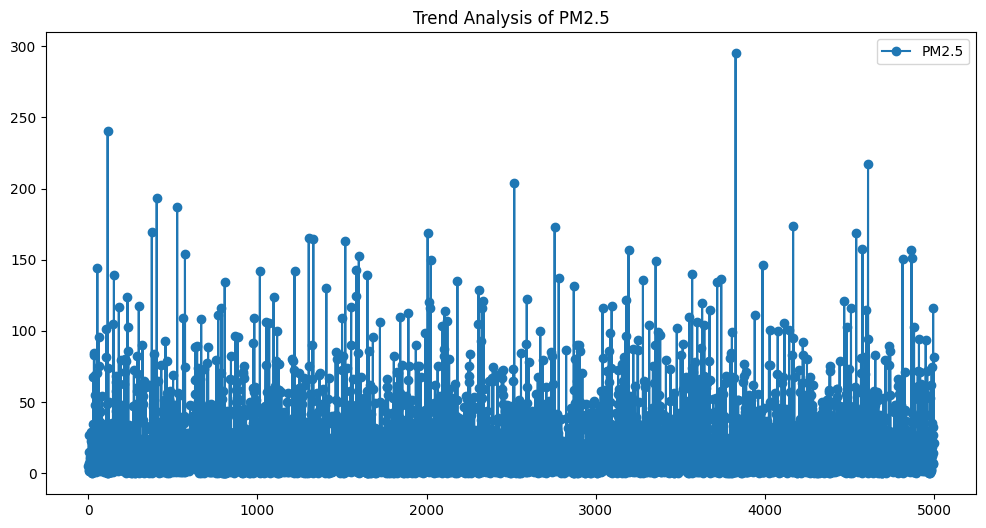

In [13]:
# 8. Trend Analysis 
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['PM2.5'], label='PM2.5', marker='o')
plt.title('Trend Analysis of PM2.5')
plt.legend()
plt.show()


In [14]:
# 9. Grouped Aggregations (by Air Quality)
grouped = data.groupby('Air Quality').mean()[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']]
print("\nGrouped Aggregations by Air Quality:")
print(grouped)


Grouped Aggregations by Air Quality:
               PM2.5       PM10        NO2        SO2        CO
Air Quality                                                    
Good          9.9109  14.989600  19.448450   5.035000  0.999590
Hazardous    41.9208  61.508000  40.596200  20.023400  2.491240
Moderate     20.4618  30.604333  26.435133   9.976933  1.505293
Poor         29.2358  44.452100  33.212800  15.027000  1.999030


Health_Risk
0    5000
Name: count, dtype: int64


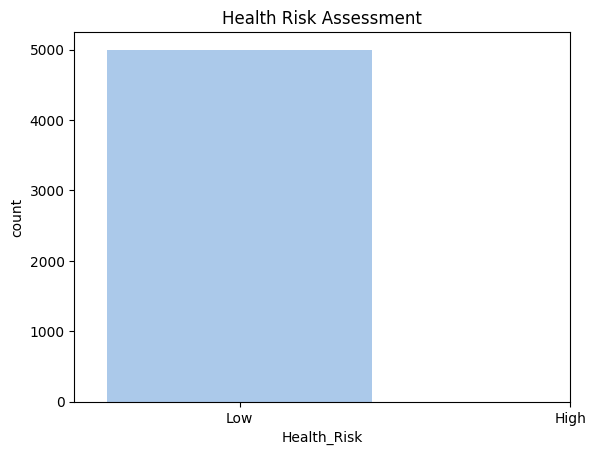

In [24]:
#Analysis 8: Health Risk Assessment
data['Health_Risk'] = data['PM2.5'].apply(lambda x: 0 if x <= 50 else 1)
print(data['Health_Risk'].value_counts())
sns.countplot(x=data['Health_Risk'], palette="pastel")
plt.title("Health Risk Assessment")
plt.xticks([0, 1], ["Low", "High"])
plt.show()


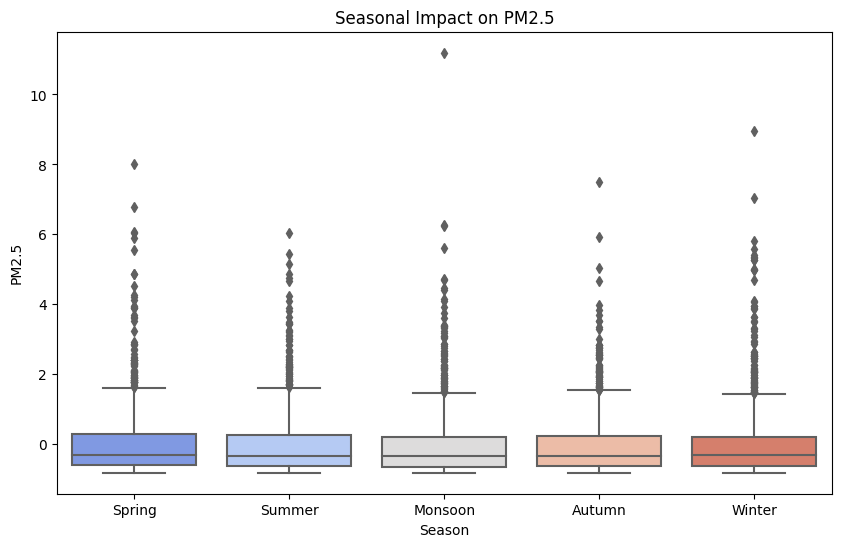

In [25]:
# Analysis 9: Seasonal Impact on Pollution
seasons = ['Spring', 'Summer', 'Monsoon', 'Autumn', 'Winter']
data['Season'] = [seasons[i % len(seasons)] for i in range(len(data))]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='PM2.5', data=data, palette="coolwarm")
plt.title("Seasonal Impact on PM2.5")
plt.show()


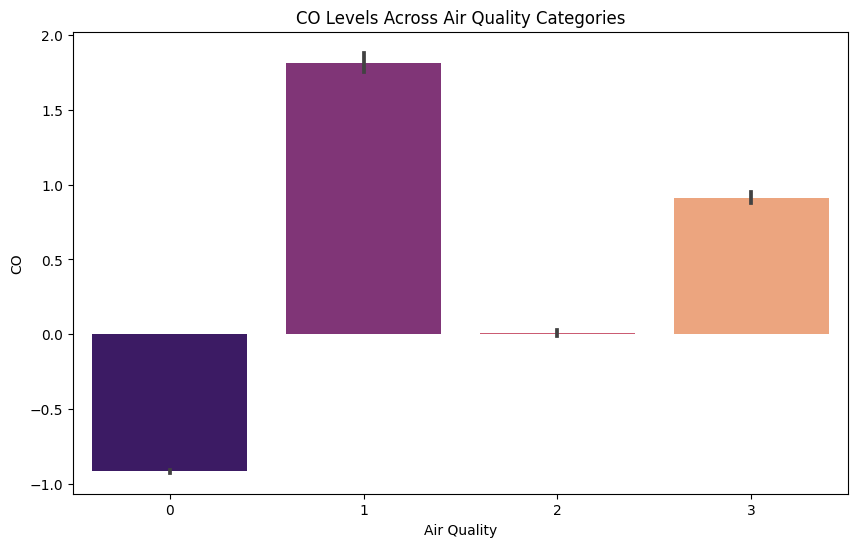

In [26]:
#Analysis 11: CO Levels and Air Quality
plt.figure(figsize=(10, 6))
sns.barplot(x='Air Quality', y='CO', data=data, palette="magma")
plt.title("CO Levels Across Air Quality Categories")
plt.show()

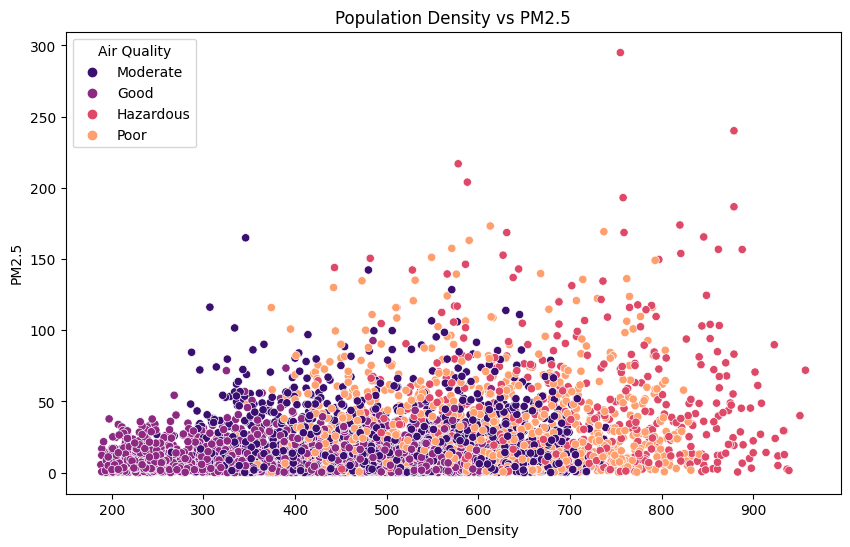

In [15]:
#Analysis 6: Population Density and Pollution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population_Density', y='PM2.5', data=data, hue='Air Quality', palette="magma")
plt.title("Population Density vs PM2.5")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

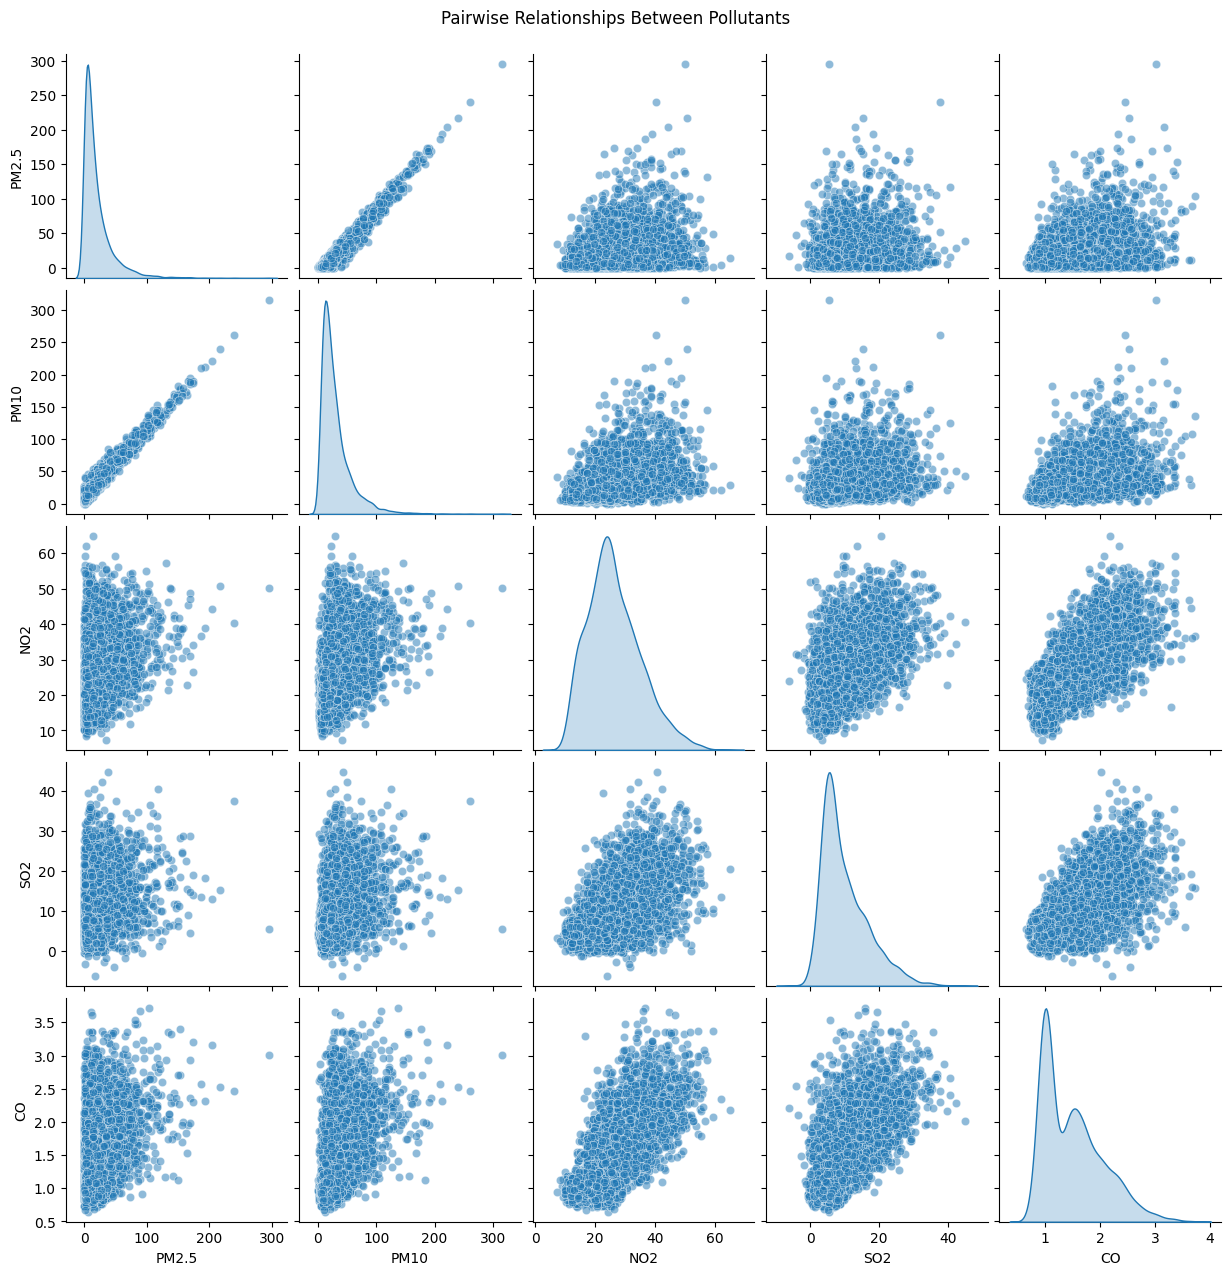

In [16]:
# 10. Insights from Relationships (Pairwise Analysis)
sns.pairplot(data[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Relationships Between Pollutants', y=1.02)
plt.show()

In [17]:
print(data.head())
print(data.info())
print(data.isnull().sum())

   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature

In [18]:
# Fill missing numerical values with the mean (only for numeric columns)
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# For categorical columns (if any), fill with the mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


In [19]:
# Encode 'Air Quality' (assuming it's a target variable)
label_encoder = LabelEncoder()
data['Air Quality'] = label_encoder.fit_transform(data['Air Quality'])


In [20]:
scaler = StandardScaler()

# Select numerical columns to scale
numerical_columns = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Temperature', 'Humidity']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [21]:
# Features (X) and Target (y)
X = data.drop('Air Quality', axis=1)
y = data['Air Quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Using Random Forest Classifier as an example
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.92      0.88      0.90       111
           2       0.97      0.97      0.97       294
           3       0.88      0.90      0.89       186

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000


Confusion Matrix:
 [[409   0   0   0]
 [  0  98   0  13]
 [  0   0 285   9]
 [  0   8  10 168]]
